In [1]:
import numpy as np
m = 100 # the size of dataset!
X = 6* np.random.rand(m, 1) -3  # no min, max values!
y = 0.5* X**2 + X + 2 + np.random.randn(m, 1)

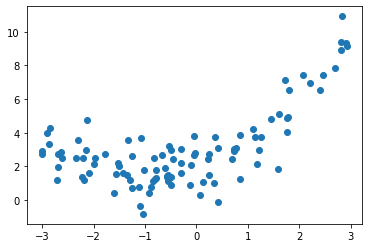

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) # make a class for it
X_poly = poly_features.fit_transform(X)

In [4]:
X[0]

array([-1.41783107])

In [5]:
X_poly[0]

array([-1.41783107,  2.01024494])

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [7]:
print(lin_reg.intercept_, lin_reg.coef_)

[1.93410659] [[0.99831106 0.51876407]]


In [8]:
x_arange = np.arange(-15, 10, 0.01)
y_arrange = lin_reg.coef_[0][1] * x_arange **2 + lin_reg.coef_[0][0] * x_arange + lin_reg.intercept_

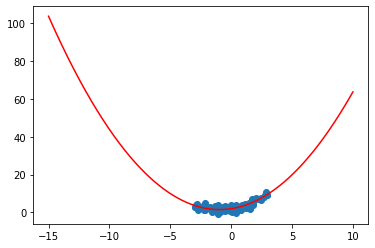

In [9]:
plt.plot(x_arange, y_arrange, 'r')
plt.scatter(X, y)

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) # split x and y ! ## using train_test_split lets you split two arrays with random values and with same corr!
    train_errors, test_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m]) # for the values model knows of!!
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="val set")
    plt.legend(loc="upper right")

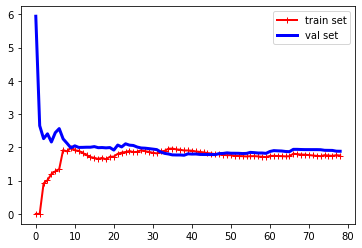

In [11]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [12]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

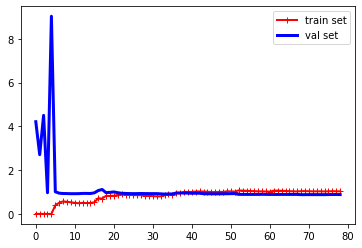

In [13]:
plot_learning_curves(polynomial_regression, X, y)

In [14]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([4.62361278])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.59630485])

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y) # another type of regressior(linear) -> that restricts the growing of weights as it learns by putting their size in loss function!

Lasso(alpha=0.1)

In [17]:
lasso_reg.predict([[1.5]])

array([4.55914493])

In [18]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # split equal!
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.56399828])

In [19]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val,y_train, y_val = train_test_split(X, y.ravel(), test_size=0.2)
#ready the data!
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler()),
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train) # in this case, the StandardScaler needs to fit before it can handle values again: to do the same thing to test!
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf") #why?
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if(val_error < minimum_val_error):
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg) ## whis is what it takes to clone a model!

In [20]:
print(best_epoch)

328


In [21]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [22]:
print(iris["data"])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [23]:
X = iris["data"][:, 3:]

In [24]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
y = (iris["target"] == 2 )

In [26]:
print(y.shape)

(150,)


In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [28]:
X_new = np.linspace(0,3,1000).reshape(-1,1) # doing this makes a one dimentional array into two dimentional one! # (-1, 1) recalculates it! while positive(1) attribute is fixed!
y_proba = log_reg.predict_proba(X_new)

In [29]:
print(X_new.shape)
print(y_proba) # it's probability, so there are two sides(for model with more than two attributes!

(1000, 1)
[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


In [30]:
print(X.shape)

(150, 1)


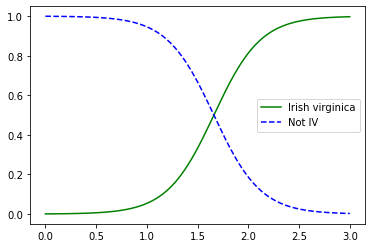

In [31]:
plt.plot(X_new, y_proba[:,1], "g-", label="Irish virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not IV")
plt.legend()
plt.savefig("Irish_virginica")

In [32]:
log_reg.predict([[1.7]])

array([ True])

In [33]:
X = iris["data"][:,(2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])